In [1]:
# activate environmennnt
using  Pkg; Pkg.activate("..")

# use packages
using CDSAPI
using NCDatasets
using PyPlot
using Dates

  Activating project at `~/Projects/ASTRAL/era5`


In [ ]:
# download ERA5 data from Copernicus Climate Data Store CDS API

# daystrings(x) = @sprintf("%02d",x)
#=
python format list of days this way:
["{:02d}".format(x) for x in range(1, 31+1)]
=#
# full region
#                             'area': [30, 40, -4, 90],
# AD 07 mooring: 68.97 °E, 14.9 °N

# May-June meridional section along 69 E, one file per year
# for year in 2018:2023
for year in 2023:2023
    req = CDSAPI.py2ju("""
                             {
                                 'product_type': 'reanalysis',
                                 'format': 'netcdf',
                                 'area': [30, 69, -4, 69],
                                 'time': '00:00',
                                 'month': [ '05', '06' ],
                                 'day':     [ '01', '02', '03', '04', '05', '06',
                                  '07', '08', '09', '10', '11', '12',
                                  '13', '14', '15', '16', '17', '18',
                                  '19', '20', '21', '22', '23', '24',
                                  '25', '26', '27', '28', '29', '30',
                                  '31',],
                                 'year': ['$(year)'],
                                 'pressure_level': [ '1', '2', '3', '5', '7', '10', '20', '30', '50', '70', '100', '125', '150', '175', '200', '225', '250', '300', '350', '400', '450', '500', '550', '600', '650', '700', '750', '775', '800', '825', '850', '875', '900', '925', '950', '975', '1000'],
                                 'variable': [ 'divergence', 'fraction_of_cloud_cover', 'geopotential',
                                     'potential_vorticity', 'specific_humidity', 'temperature',
                                     'u_component_of_wind', 'v_component_of_wind', 'vertical_velocity',
                                     'vorticity'],
                             }
                        """)

    # download commented out
    r = CDSAPI.retrieve( "reanalysis-era5-pressure-levels", req , "xsct_69e_$(year).nc" ) # saves data in .nc
end

In [2]:
# download ERA5 data from Copernicus Climate Data Store CDS API                          'area': [30, 40, -4, 90],
# AD 07 mooring: 68.97 °E, 14.9 °N
# May-June meridional section along 15 N, one file per year

# for year in 2018:2023
for year in 2023:2023
    req = CDSAPI.py2ju("""
                             {
                                 'product_type': 'reanalysis',
                                 'format': 'netcdf',
                                 'area': [15, 40, 15, 90],
                                 'time': '00:00',
                                 'month': [ '05', '06' ],
                                 'day':     [ '01', '02', '03', '04', '05', '06',
                                  '07', '08', '09', '10', '11', '12',
                                  '13', '14', '15', '16', '17', '18',
                                  '19', '20', '21', '22', '23', '24',
                                  '25', '26', '27', '28', '29', '30',
                                  '31',],
                                 'year': ['$(year)'],
                                 'pressure_level': [ '1', '2', '3', '5', '7', '10', '20', '30', '50', '70', '100', '125', '150', '175', '200', '225', '250', '300', '350', '400', '450', '500', '550', '600', '650', '700', '750', '775', '800', '825', '850', '875', '900', '925', '950', '975', '1000'],
                                 'variable': [ 'divergence', 'fraction_of_cloud_cover', 'geopotential',
                                     'potential_vorticity', 'specific_humidity', 'temperature',
                                     'u_component_of_wind', 'v_component_of_wind', 'vertical_velocity',
                                     'vorticity'],
                             }
                        """)

    # download commented out
    r = CDSAPI.retrieve( "reanalysis-era5-pressure-levels", req , "xsct_15n_$(year).nc" ) # saves data in .nc
end

┌ Debug: POST /api/v2/resources/reanalysis-era5-pressure-levels HTTP/1.1
└ @ HTTP.StreamRequest ~/.julia/packages/HTTP/uAaAw/src/clientlayers/StreamRequest.jl:23
┌ Debug: HTTP/1.1 202 Accepted <= (POST /api/v2/resources/reanalysis-era5-pressure-levels HTTP/1.1)
└ @ HTTP.StreamRequest ~/.julia/packages/HTTP/uAaAw/src/clientlayers/StreamRequest.jl:82


request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status queued
request queue status running
request queue status running
request queue status running
request queue status completed


┌ Info: Downloading
│   source = "https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/adaptor.mars.internal-1687232003.6834478-23933-9-04bbaa26-4967-42ac-82de-8f55b2cf1451.nc"
│   dest = "xsct_15n_2023.nc"
│   progress = 0.0153
│   time_taken = "1.05 s"
│   time_remaining = "67.38 s"
│   average_speed = "97.711 KiB/s"
│   downloaded = "102.499 KiB"
│   remaining = "6.430 MiB"
└   total = "6.530 MiB"
┌ Info: Downloading
│   source = "https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/adaptor.mars.internal-1687232003.6834478-23933-9-04bbaa26-4967-42ac-82de-8f55b2cf1451.nc"
│   dest = "xsct_15n_2023.nc"
│   progress = 0.0332
│   time_taken = "2.07 s"
│   time_remaining = "60.37 s"
│   average_speed = "107.090 KiB/s"
│   downloaded = "221.997 KiB"
│   remaining = "6.313 MiB"
└   total = "6.530 MiB"
┌ Info: Downloading
│   source = "https://download-0020.copernicus-climate.eu/cache-compute-0020/cache/data1/adaptor.mars.internal-1687232003.68344

In [ ]:
# use coasts.mat to plot land outlines
using MAT
coast = matread("coast.mat")
# separate landmasses into individual index ranges
ibnd = [0; findall(isnan.(coast["lat"][:]) .&& isnan.(coast["long"][:])); length(coast["lat"])+1]
rng = [ ibnd[k]+1 : ibnd[k+1]-1 for k in 1:length(ibnd)-1] # vector of landmass ranges

"filter only index ranges for landmasses in a lon-lat box"
function rng_in_lonlatbox(rng, lon, lat, lon0, lon1, lat0, lat1)
    flt(rng) = any(lon0.<lon[rng].<lon1 .&& lat0.<lat[rng].<lat1)
    return filter(flt, rng)
end

"plot regional coastlines"
function ascoast!(ax, asrng )
    for r in asrng
        ax.plot(coast["long"][r], coast["lat"][r], color=0.7.*[1 1 1])
    end
end

# plot outlines of 4 Arabian Sea landmasses
asrng = rng_in_lonlatbox( rng, coast["long"][:], coast["lat"][:],  40,90 , -4,30 )
ax = subplot(1,1,1)
ascoast!(ax, asrng)
ylim([-4, 30])
xlim([40, 90])

In [21]:
# # get data from local copy for 1 year
myear = 2023
it=1
ds = NCDatasets.Dataset("xsct_69e_$(myear).nc")
ds["latitude"][:], ds["level"][:], permutedims(ds[var][1,:,:,15*it])
nt = size(ds[var],4)
1:min(floor(Int,nt/15), 4)

1:1

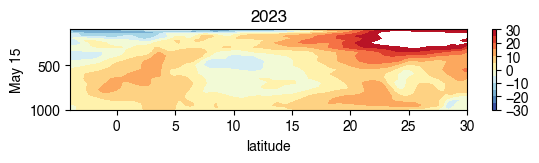

In [22]:
# plot 4 meridional cross-section snapshots each separated by 15 d
# May 15, 30, June 14, 29

var = "u"
clev = -30:5:30

# for myear = 2018:2023
for myear = 2023:2023
    ds = NCDatasets.Dataset("xsct_69e_$(myear).nc")
    
    clf()
    nt = size(ds[var],4)
    for it = 1:min(floor(Int,nt/15), 4)
        subplot(4,1,it)
        it == 1 && title("$(myear)")
        contourf(ds["latitude"][:], ds["level"][:], permutedims(ds[var][1,:,:,15*it]), 
            levels = clev,
            vmin = -30, vmax = 30, cmap=ColorMap("RdYlBu_r"))
        colorbar()
        ylim([1000, 100])
        ylabel("$(Dates.format(DateTime(myear,05,01)+Day(15*it-1), "U dd"))")
    end
    xlabel("latitude")
    
    savefig("xsect_69e_may15-jun29_$(myear)_$(var).svg")
end

In [ ]:
myear = 2023
    clf()
    for it = [1]
        subplot(4,1,it)
        it == 1 && title("$(myear)")
        contourf(ds["latitude"][:], ds["level"][:], permutedims(ds["u"][1,:,:,15*it]), 
            levels = clev,
            vmin = -30, vmax = 30, cmap=ColorMap("RdYlBu_r"))
        colorbar()
        ylim([1000, 100])
        ylabel("$(Dates.format(DateTime(myear,05,01)+Day(15*it-1), "U dd"))")
    end
    xlabel("latitude")
    
    savefig("xsect_69e_may15-jun29_$(myear).svg")

In [ ]:
ds["v"]

In [4]:
# plot 4 zonal cross-section snapshots each separated by 15 d
# May 15, 30, June 14, 29

var = "pv"
clev = -3e-4 : 0.5e-4 : 3e4
# var = "v"
# clev = -30 : 5 : 30

for myear = 2018:2022
    ds = NCDatasets.Dataset("xsct_15n_$(myear).nc")
    
    clf()
    for it = 1:4
        subplot(4,1,it)
        it == 1 && title("$(myear) $(ds[var].long_name)")
        contourf(ds["longitude"][:], ds["level"][:], permutedims(ds[var][:,1,:,15*it]), 
            levels = clev, vmin = clev[1], vmax = clev[end],
            cmap=ColorMap("RdYlBu_r"))
        colorbar()
        ylim([1000, 100])
        ylabel("$(Dates.format(DateTime(myear,05,01)+Day(15*it-1), "U dd"))")
    end
    xlabel("longitude")
    
    savefig("xsect_15n_may15-jun29_$(myear)_$(var).svg")
end

LoadError: type CFVariable has no field long_name

In [5]:
var = pv
ds[var].long_name

LoadError: UndefVarError: pv not defined

In [6]:
# plot the variable
function plotas!(ax, var, level=1, time=31)
    ct = ax.contour(ds["longitude"][:], ds["latitude"][:], ds[var][:,:,level,time]', 14200:40:14800, vmin=14200, vmax=14800)
    return ct
end

plotas! (generic function with 3 methods)

In [7]:
# plot 5 years of Z850
clf()
level = 1
for i = 1:5
    ax = subplot(2,3, i)
    ax.set_xlim(40, 90)
    ax.set_ylim(-4, 30)
    ascoast!( ax, asrng )
    
    year = i-1
    time = year*(31+30)+31+4 # June 4s
    ct = plotas!( ax, "z", level, time )
    i == 5 && ct.colorbar
    # colorbar(ct)
    if i == 2
        ax.set_title( "$(Dates.format(ds["time"][time], "U d")) $(ds["level"][level]) hPa $(ds[var].attrib["long_name"]) $(ds[var].attrib["units"])\n $(Dates.year(ds["time"][time]))" )
    else
        ax.set_title( "$(Dates.year(ds["time"][time]))" )
    end
end
tight_layout()

LoadError: UndefVarError: ascoast! not defined

In [8]:
# plot 5 years of vorticity at 850 hPa

level = 1
var = "vo"

clf()
for i = 1:5
    ax = subplot(2,3, i)
    ax.set_xlim(40, 90)
    ax.set_ylim(-4, 30)
    ascoast!( ax, asrng )
    
    year = i-1
    time = year*(31+30)+31+4 # June 4s
    ct = ax.contourf(ds["longitude"][:], ds["latitude"][:], 
          ds[var][:,:,level,time]', -1.5e-4:3e-5:3e-4,
        cmap = ColorMap("RdYlBu_r")) #, 16, vmin=-1.5e-4, vmax=1.5e4)
    i == 5 && colorbar(ct)
    # colorbar(ct)
    if i == 2
        ax.set_title( "$(Dates.format(ds["time"][time], "U d")) $(ds["level"][level]) hPa $(ds[var].attrib["long_name"]) $(ds[var].attrib["units"])\n $(Dates.year(ds["time"][time]))" )
    else
        ax.set_title( "$(Dates.year(ds["time"][time]))" )
    end
end
tight_layout()

LoadError: UndefVarError: ascoast! not defined